# Assigment no:4

**Title:** Assignment on Clustering Techniques   
**Aim:** Implement Clustering Techniques technique on customer dataset 

**Objectives:**

A. Apply Data pre-processing (Label Encoding , Data Transformation….) 
necessary.

B. Perform data-preparation( Train-Test Split)

C. Apply Machine Learning Algorithm

D. Evaluate Model.

E. Apply Cross-Validation and Evaluate Model


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import csv file in pandas data frame
dataset = pd.read_csv('mall.csv')

# **Dataset Description**

Data Set: https://www.kaggle.com/shwetabh123/mall-customers

This dataset gives the data of Income and money spent by the customers visiting a Shopping
Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score.
Therefore, as a mall owner you need to find the group of people who are the profitable
customers for the mall owner. Apply at least two clustering algorithms (based on Spending
Score) to find the group of customers.

In [3]:
# top 5 rows of a data frame dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\Friends Network\AppData\Local\Temp\ipykernel_12928\2401310892.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Annual Income (k$)'])


Text(0, 0.5, 'Count')

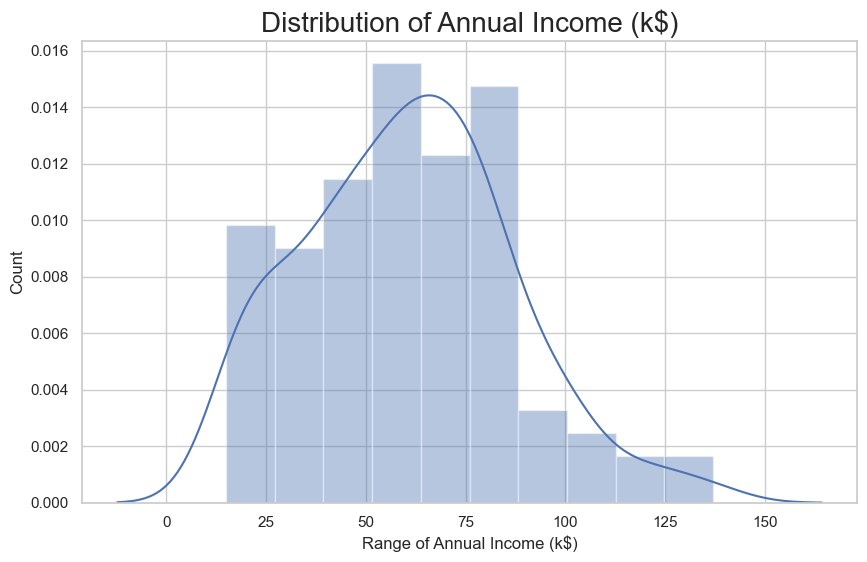

In [4]:
# Let us look at the data distribution
# Distribution of Annnual Income

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')


# Most of the annual income falls between 50K to 85K.

C:\Users\Friends Network\AppData\Local\Temp\ipykernel_12928\1635514262.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


Text(0, 0.5, 'Count')

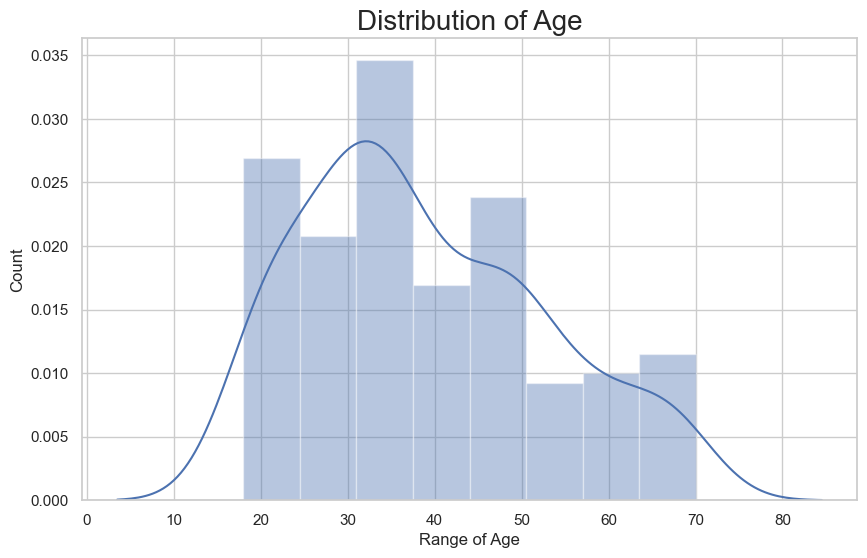

In [5]:
# Distribution of age

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

# The maximum spending score is in the range of 40 to 60.

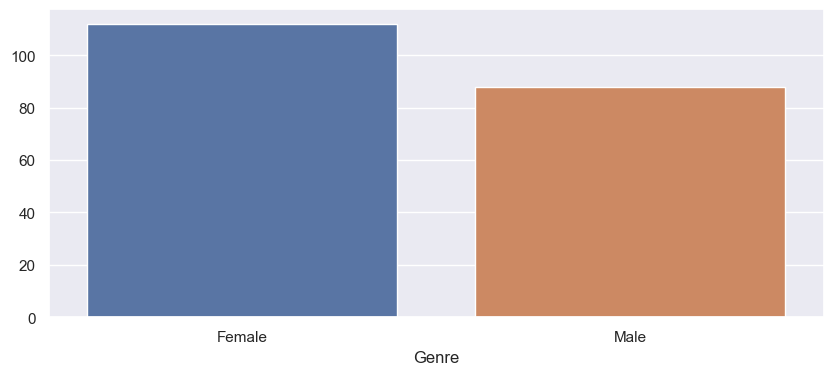

In [6]:
# Gender Analysis
genders = dataset.Genre.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# More female customers than male.


In [7]:
# get annual income and spending score values
X = dataset.iloc[:, [3, 4]].values

### Using the elbow method to find the optimal number of clusters

Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

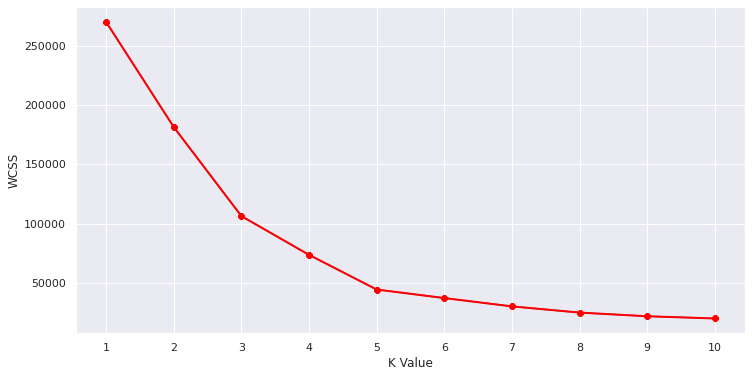

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [9]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
dataset["label"] = y
#The new dataframe with the clustering done
dataset.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


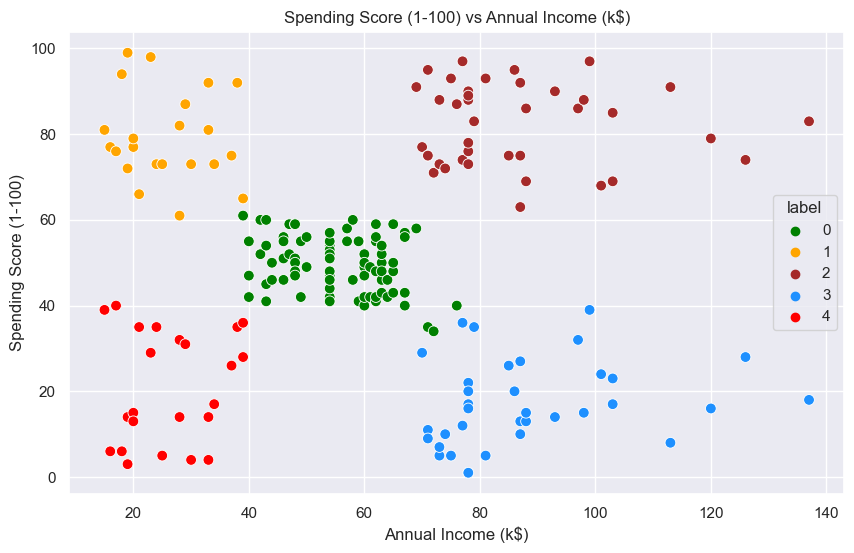

In [10]:
# Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = dataset  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

We can clearly see that 5 different clusters have been formed from the data. The red cluster is the customers with the least income and least spending score, similarly, the blue cluster is the customers with the most income and most spending score

### k-Means Clustering on the basis of 3D data 

Now, we shall be working on 3 types of data. Apart from the spending score and annual income of customers, we shall also take in the age of the customers.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

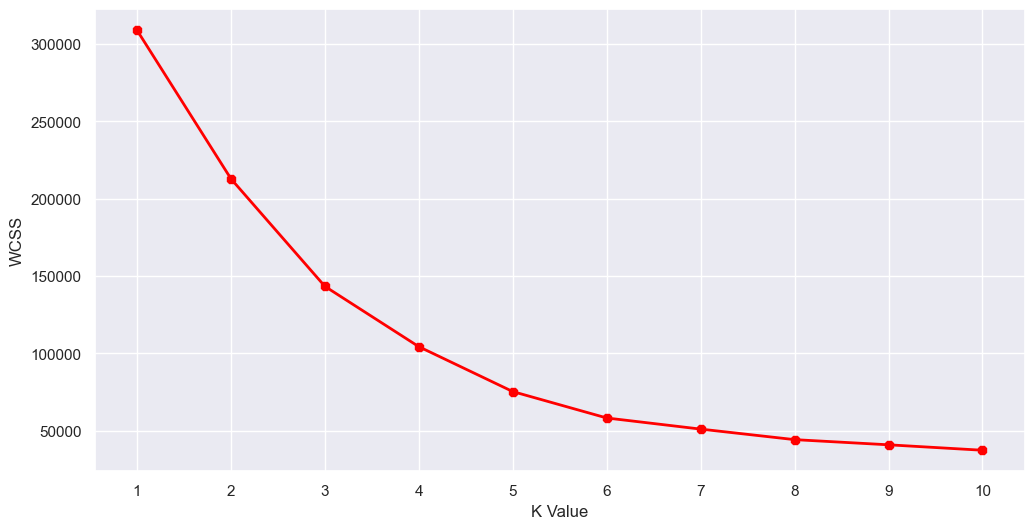

In [11]:
#Taking the features
X2=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [12]:
# Here can assume that K=5 will be a good value.

#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
dataset["label"] = y2
#The data with labels
dataset.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,7
1,2,Male,21,15,81,3
2,3,Female,20,16,6,6
3,4,Female,23,16,77,3
4,5,Female,31,17,40,7


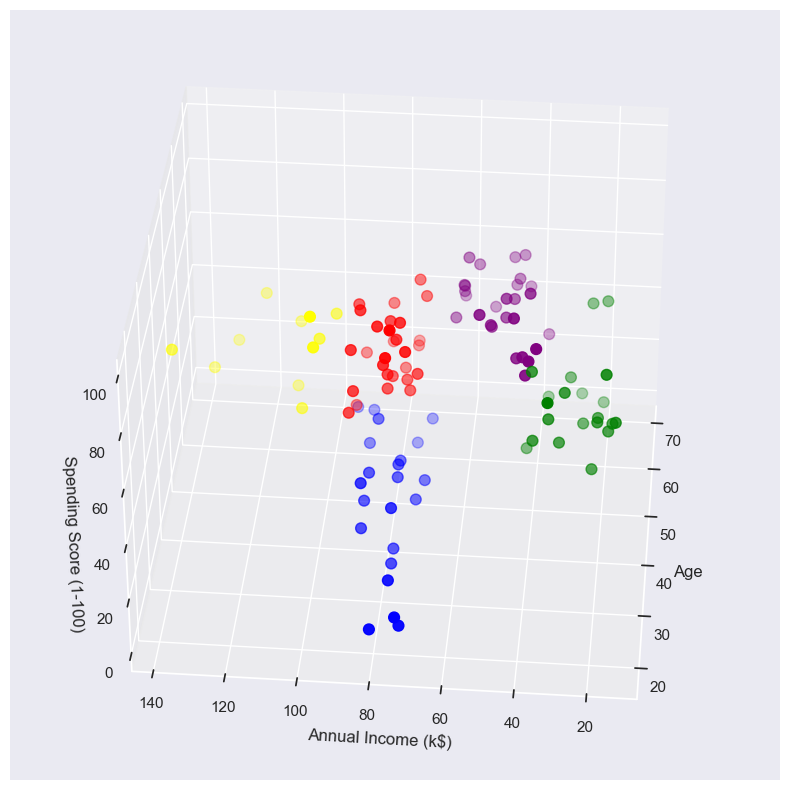

In [13]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[dataset.label == 0], dataset["Annual Income (k$)"][dataset.label == 0], dataset["Spending Score (1-100)"][dataset.label == 0], c='purple', s=60)
ax.scatter(dataset.Age[dataset.label == 1], dataset["Annual Income (k$)"][dataset.label == 1], dataset["Spending Score (1-100)"][dataset.label == 1], c='red', s=60)
ax.scatter(dataset.Age[dataset.label == 2], dataset["Annual Income (k$)"][dataset.label == 2], dataset["Spending Score (1-100)"][dataset.label == 2], c='blue', s=60)
ax.scatter(dataset.Age[dataset.label == 3], dataset["Annual Income (k$)"][dataset.label == 3], dataset["Spending Score (1-100)"][dataset.label == 3], c='green', s=60)
ax.scatter(dataset.Age[dataset.label == 4], dataset["Annual Income (k$)"][dataset.label == 4], dataset["Spending Score (1-100)"][dataset.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [14]:
# What we get is a 3D plot. Now, if we want to know the customer IDs, we can do that too.

cust1=dataset[dataset["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=dataset[dataset["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=dataset[dataset["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=dataset[dataset["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=dataset[dataset["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 28
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171
 173 175 177 179]
--------------------------------------------
Number of customer in 3rd group= 27
They are - [ 41  47  51  54  55  57  58  60  61  63  64  65  68  71  73  74  75  81
  83  87  91 103 107 109 110 111 117]
--------------------------------------------
Number of customer in 4th group= 21
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 5th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------


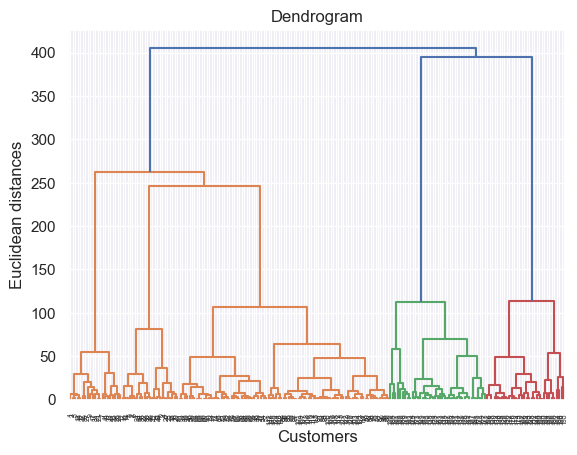

In [15]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


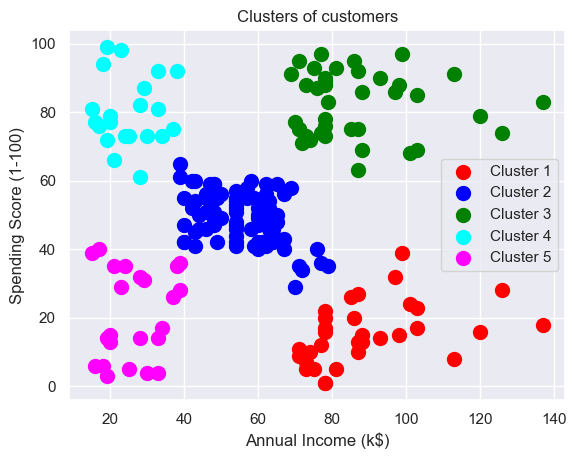

In [17]:
# Visualising the clusters

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()